# CUSTOMER CHURN PREDICTION
Develop a model to predict customer churn for a subscription-based service or business. Use historical customer data, including features like usage behavior and customer emographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

## Importing Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
df = pd.read_csv('./Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Since rownumber, customerid and surname are not useful for prediction, we can drop them.

In [53]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [55]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [56]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [57]:
# onehot encoding for categorical variables
# label encoding for binary variables

df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [58]:
df['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [59]:
geography_onehot_data = pd.get_dummies(df['Geography'])
df = pd.concat([df,geography_onehot_data],axis=1)
df.drop(['Geography'],axis=1,inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [60]:
geography_onehot_data.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [61]:
df.dtypes

CreditScore          int64
Gender               int32
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
France               uint8
Germany              uint8
Spain                uint8
dtype: object

<AxesSubplot:>

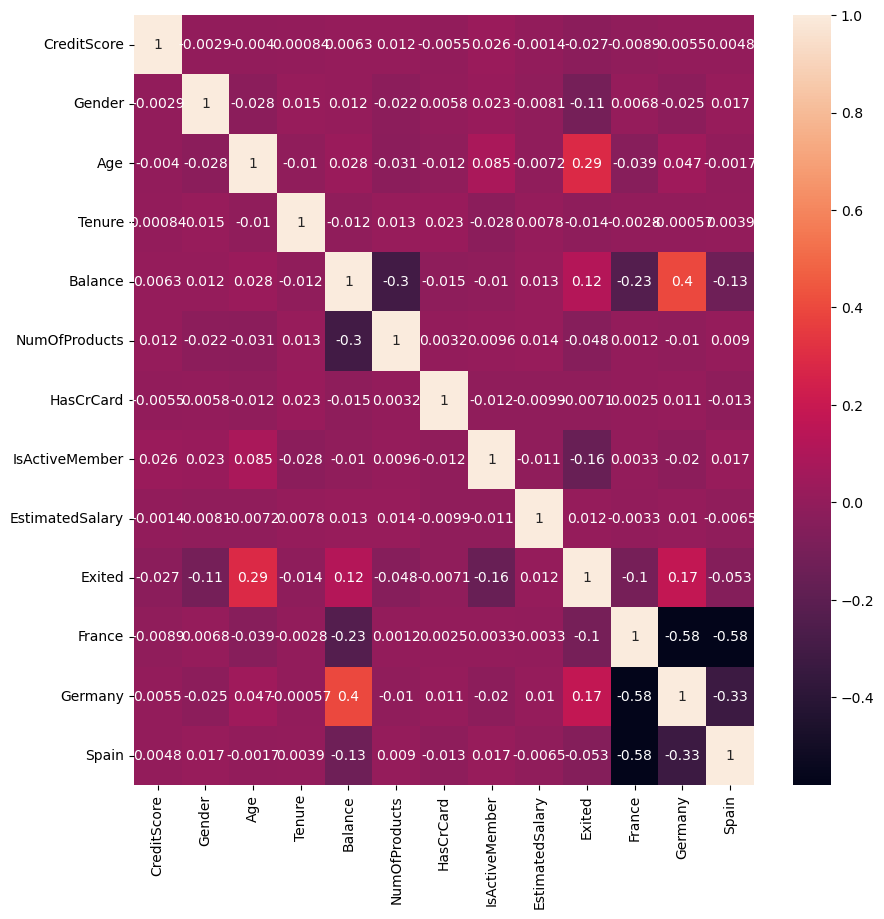

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

### Modelling without Standardization

In [63]:
X = df.drop('Exited',axis=1)
y = df['Exited']

In [64]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)

X_train.shape:  (8000, 12)
X_test.shape:  (2000, 12)
y_train.shape:  (8000,)
y_test.shape:  (2000,)


In [65]:
result_without_standardization = {}
result_with_standardization = {}

### Logistc Regression

In [66]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression()
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_test)
result_without_standardization['Logistic Regression'] = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression w/o Standardization: ", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression w/o Standardization:  0.781


### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
result_without_standardization['Random Forest'] = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest w/o Standardization:", accuracy_score(y_test, y_pred))

Accuracy of Random Forest w/o Standardization: 0.849


### Gradiant Boosting Classifier

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gc1 = GradientBoostingClassifier()
gc1.fit(X_train, y_train)
y_pred = gc1.predict(X_test)
result_without_standardization['Gradiant Boosting'] = accuracy_score(y_test, y_pred)
print("Accuracy of Gradiant Bossting Classifier w/o Standarization:",accuracy_score(y_test, y_pred))

Accuracy of Gradiant Bossting Classifier w/o Standarization: 0.87


## Modelling with Standardization

In [69]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

### Logistic Regression

In [70]:
lr2 = LogisticRegression()
lr2.fit(X_train_std, y_train)
y_pred_std = lr2.predict(X_test_std)
result_with_standardization['Logistic Regression'] = accuracy_score(y_test, y_pred_std)
print("Accuracy of Logistic Regression w/ Standardization: ", accuracy_score(y_test, y_pred_std))

Accuracy of Logistic Regression w/ Standardization:  0.8045


### Random Forest Classifier

In [71]:
rf2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf2.fit(X_train_std, y_train)
y_pred_std = rf2.predict(X_test_std)
result_with_standardization['Random Forest'] = accuracy_score(y_test, y_pred_std)
print("Accuracy of Random Forest w/ Standardization:", accuracy_score(y_test, y_pred_std))

Accuracy of Random Forest w/ Standardization: 0.846


### Gradiant Boosting Classifier

In [72]:
gc2 = GradientBoostingClassifier()
gc2.fit(X_train_std, y_train)
y_pred_std = gc2.predict(X_test_std)
result_with_standardization['Gradiant Boosting'] = accuracy_score(y_test, y_pred)
print("Accuracy of Gradiant Bossting Classifier w/ Standarization:",accuracy_score(y_test, y_pred_std))

Accuracy of Gradiant Bossting Classifier w/ Standarization: 0.87


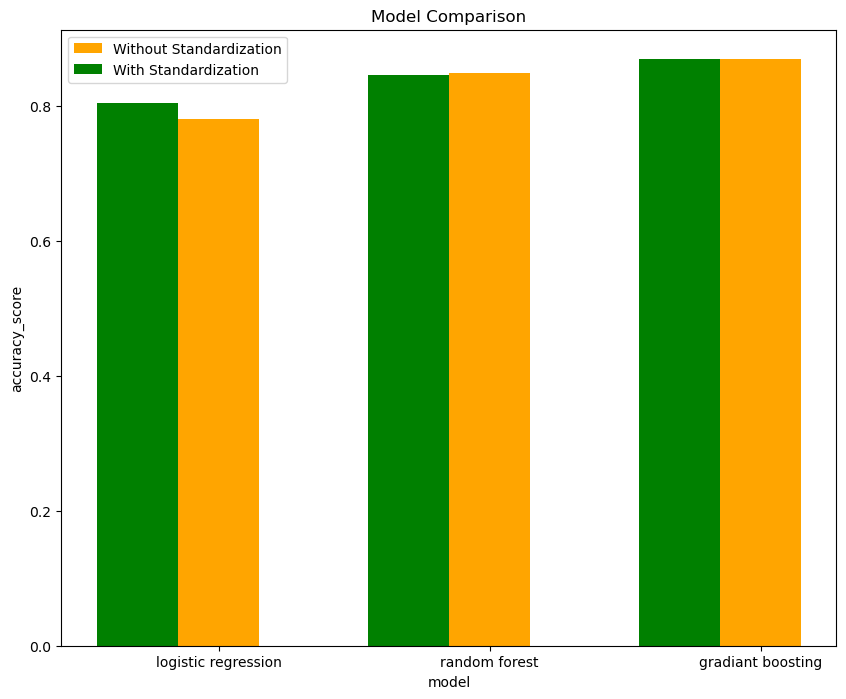

In [73]:
without_standardization = pd.DataFrame(result_without_standardization.items(), columns=['model', 'accuracy_score'])
with_standardization = pd.DataFrame(result_with_standardization.items(), columns=['model', 'accuracy_score'])

y1 = without_standardization['accuracy_score']
y2 = with_standardization['accuracy_score']

fig, ax = plt.subplots(figsize = (10,8))
ind = np.arange(len(without_standardization))

width = 0.3  
plt.bar(ind, y1, width, color = 'orange')
plt.bar(ind - width, y2, width,color = 'green')

plt.title('Model Comparison')
plt.xlabel('model')
plt.ylabel('accuracy_score')
plt.xticks(np.arange(3), ['logistic regression', 'random forest','gradiant boosting'])
plt.legend(['Without Standardization', 'With Standardization'])

In [74]:
without_standardization

,model,accuracy_score
0,Logistic Regression,0.781
1,Random Forest,0.849
2,Gradiant Boosting,0.870


In [75]:
with_standardization

,model,accuracy_score
0,Logistic Regression,0.8045
1,Random Forest,0.8460
2,Gradiant Boosting,0.8700
